Reconstruction of W mass from W -> l + nu

(http://opendata.atlas.cern/release/2020/documentation/physics/SL1.html)

In [15]:
import ROOT
import math
#%jsroot on

print("Opening file")
#f = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_364169.Wmunu_PTV1000_E_CMS.1largeRjet1lep.root") ## 13 TeV sample
f = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1lep/Data/data_A.1lep.root ") ## 13 TeV sample
#f = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/Data/data_A.1largeRjet1lep.root ") ## 13 TeV sample

canvas1 = ROOT.TCanvas("Canvas1","c1",800,600)
hist_stack = ROOT.THStack("stacked","Transverse mass of the W boson; mass [GeV]; events")
hist_enu = ROOT.TH1F("enu","Transverse mass of the W boson; mass [GeV]; events",100,-0.5,200.5)
hist_enu.SetFillColor(2)
hist_munu = ROOT.TH1F("munu","Transverse mass of the W boson; mass [GeV]; events",100,-0.5,200.5)
hist_munu.SetFillColor(3)
hist_taunu = ROOT.TH1F("taunu","Transverse mass of the W boson; mass [GeV]; events",100,-0.5,200.5)
hist_taunu.SetFillColor(4)
hist_ptcone30 = ROOT.TH1F("ptcone","P_T cone 30; ptcone30; events",100,-0.1,0.5)
hist_taunu.SetFillColor(2)
tree = f.Get("mini")
event_count = tree.GetEntries()
print("Entries: ", event_count)
counter = 0
resets = 0


for event in tree:
    counter += 1
    if round(counter/event_count * resets, 2) == 0.01: #Only for testing
        break
    if counter == round(event_count * 0.01):
        resets += 1
        print("Progress: ", round(counter/event_count * resets, 2))
        counter = 0
    if tree.lep_n > 1:
        print("lepton multiplicity greater than 1: ", tree.lep_n)
    #Event selection
    hist_ptcone30.Fill(tree.lep_ptcone30[0])
    if tree.trigE or tree.trigM:
        if tree.lep_pt[0] > 35000: #Lepton p_t > 35 GeV, lep_pt in MeV
            if tree.met_et > 30000: #Missing E_T > 30 GeV, lep_pt in MeV
                M_WT = math.sqrt(2 * tree.lep_pt[0] * tree.met_et * (1 - math.cos(tree.lep_phi[0] - tree.met_phi)))
                #print(M_WT)
                if M_WT > 0 : #Reconstructed transewerse momentum is above 60 GeV
                    if tree.lep_type[0] == 11 or tree.lep_type[0] == -11:
                        hist_enu.Fill(M_WT / 1000)
                    if tree.lep_type[0] == 13 or tree.lep_type[0] == -13:
                        hist_munu.Fill(M_WT / 1000)
                    if tree.lep_type[0] == 15 or tree.lep_type[0] == -15:
                        hist_taunu.Fill(M_WT / 1000)
print("Done!")


#hist.SetFillColor(2)
hist_stack.Add(hist_enu)
hist_stack.Add(hist_munu)
hist_stack.Add(hist_taunu)
hist_stack.Draw("")

Opening file
Entries:  9796409
Progress:  0.01
Done!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas1
Warning in <TDavixFile::Append>: Replacing existing TH1: taunu (Potential memory leak).


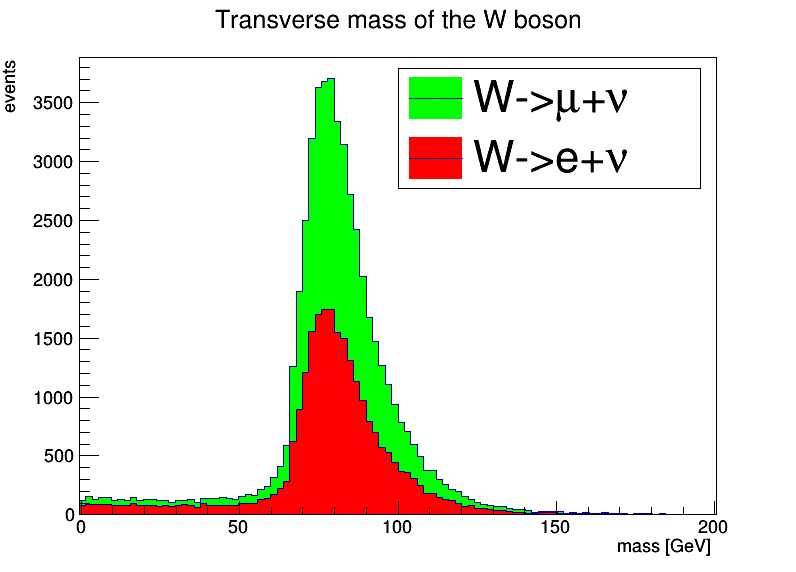

In [16]:
canvas1.Draw("hist")
legend = ROOT.TLegend(1.0,1.0,1.0,1.0)
legend.AddEntry(hist_munu, "W->#mu+#nu")
legend.AddEntry(hist_enu, "W->e+#nu")
legend.Draw()

#legend.AddEntry(hist_taunu, "W->tau+nu")
#scale = hist_stack.Integral()
#print("Scale is: ", scale)

In [17]:
ratio = hist_enu.Integral()/hist_munu.Integral()
print("Ratio (W->e+nu)/(W->mu+nu) from data is ", "{:0.2f}".format(ratio), ", theoretical value is 1.01")

Ratio (W->e+nu)/(W->mu+nu) from data is  0.96 , theoretical value is 1.01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas2


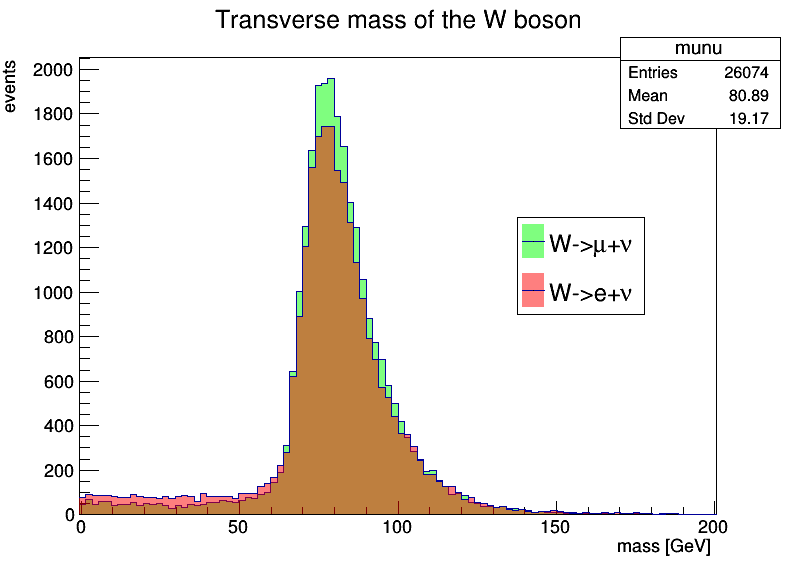

In [18]:
#canvas.Clear()
canvas2 = ROOT.TCanvas("Canvas2","c2",800,600)
canvas2.cd()
hist_munu.SetFillColorAlpha(3, 0.5)
hist_munu.Draw("SAME")
hist_enu.SetFillColorAlpha(2, 0.5)
hist_enu.Draw("SAME")
legend2 = ROOT.TLegend(0.65,0.45,0.81,0.62)
legend2.AddEntry(hist_munu, "W->#mu+#nu")
legend2.AddEntry(hist_enu, "W->e+#nu")
legend2.Draw()
canvas2.Draw("hist")
#hist_munu.Draw("SAME")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas3


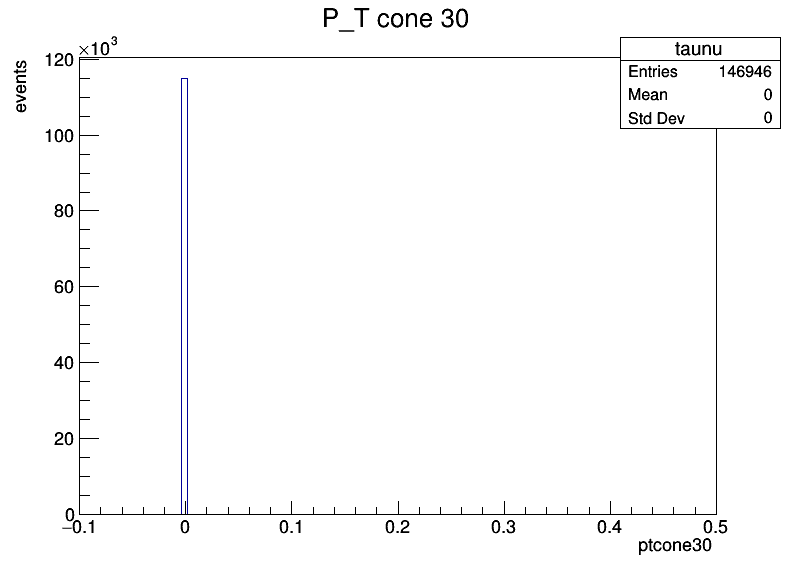

In [19]:
canvas3 = ROOT.TCanvas("Canvas3","c3",800,600)
canvas3.cd()
hist_ptcone30.Draw("")
canvas3.Draw("hist")

In [14]:
import ROOT
import math

print("Opening file")
#Z reconstruction
f = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/Data/data_A.2lep.root") ## 13 TeV sample
canvas4 = ROOT.TCanvas("Canvas4","c4",800,600)
hist_Z_ll = ROOT.TH1F("Zll", "Mass of the Z boson; mass [GeV]; events",100,55.5,115.5)

tree = f.Get("mini")
event_count = tree.GetEntries()
print("Entries: ", event_count)
counter = 0
resets = 0

for event in tree:
    counter += 1
    if round(counter/event_count * resets, 2) == 1.1: #Only for testing
        break
    if counter == round(event_count * 0.01):
        resets += 1
        print("Progress: ", round(counter/event_count * resets, 2))
        counter = 0
    if tree.trigE or tree.trigM:
        if tree.lep_n == 2:
            if tree.lep_type[0] == tree.lep_type[1]:
                if not tree.lep_charge[0] == tree.lep_charge[1]:
                    p1 = ROOT.TLorentzVector()
                    p1.SetPtEtaPhiE(tree.lep_pt[0], tree.lep_eta[0], tree.lep_phi[0], tree.lep_E[0])
                    p2 = ROOT.TLorentzVector()
                    p2.SetPtEtaPhiE(tree.lep_pt[1], tree.lep_eta[1], tree.lep_phi[1], tree.lep_E[1])
                    mass = math.sqrt((p1 + p2)*(p1 + p2))/1000 #conversion to GeV
                    if mass >= 66 and mass <= 116:
                        hist_Z_ll.Fill(mass)

Opening file
Entries:  668152
Progress:  0.01
Progress:  0.02
Progress:  0.03
Progress:  0.04
Progress:  0.05
Progress:  0.06
Progress:  0.07
Progress:  0.08
Progress:  0.09
Progress:  0.1
Progress:  0.11
Progress:  0.12
Progress:  0.13
Progress:  0.14
Progress:  0.15
Progress:  0.16
Progress:  0.17
Progress:  0.18
Progress:  0.19
Progress:  0.2
Progress:  0.21
Progress:  0.22
Progress:  0.23
Progress:  0.24
Progress:  0.25
Progress:  0.26
Progress:  0.27
Progress:  0.28
Progress:  0.29
Progress:  0.3
Progress:  0.31
Progress:  0.32
Progress:  0.33
Progress:  0.34
Progress:  0.35
Progress:  0.36
Progress:  0.37
Progress:  0.38
Progress:  0.39
Progress:  0.4
Progress:  0.41
Progress:  0.42
Progress:  0.43
Progress:  0.44
Progress:  0.45
Progress:  0.46
Progress:  0.47
Progress:  0.48
Progress:  0.49
Progress:  0.5
Progress:  0.51
Progress:  0.52
Progress:  0.53
Progress:  0.54
Progress:  0.55
Progress:  0.56
Progress:  0.57
Progress:  0.58
Progress:  0.59
Progress:  0.6
Progress:  0.61


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas4


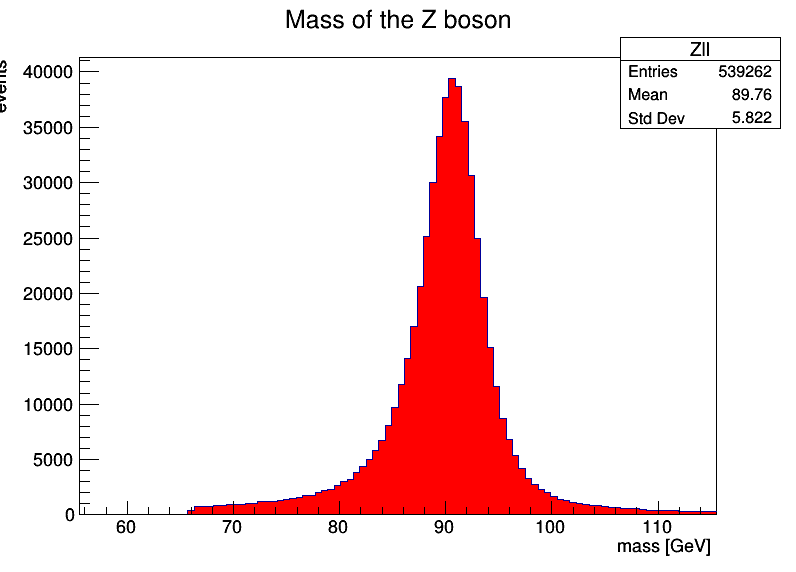

In [15]:
hist_Z_ll.SetFillColor(2)
canvas4.cd()
hist_Z_ll.Draw("")                    
canvas4.Draw("hist")